# K-Nearest Neighbors Algorithm:

Accuracy: 0.488


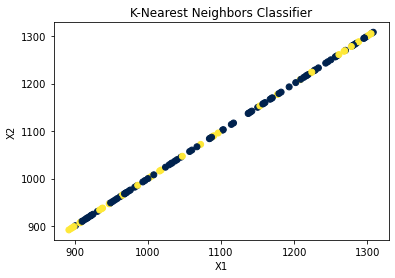

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def load_dataset(gender_submission):
    dataset = pd.read_csv(gender_submission)
    X = dataset.iloc[:, :-1].values
    y = dataset.iloc[:, -1].values
    return X, y

def train_test_split(X, y, test_ratio=0.3, random_state=42):
    np.random.seed(random_state)
    shuffled_indices = np.random.permutation(len(X))
    test_size = int(len(X) * test_ratio)
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]
    return X_train, X_test, y_train, y_test

def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

class KNNClassifier:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def _get_k_nearest_neighbors(self, x):
        distances = np.array([euclidean_distance(x, x_train) for x_train in self.X_train])
        indices = np.argsort(distances)[:self.k]
        return self.y_train[indices]
    
    def predict(self, X_test):
        y_pred = np.zeros(len(X_test))
        
        for i, x_test in enumerate(X_test):
            neighbors = self._get_k_nearest_neighbors(x_test)
            unique, counts = np.unique(neighbors, return_counts=True)
            y_pred[i] = unique[np.argmax(counts)]
        
        return y_pred

def main():
    # Load dataset
    filename = "gender_submission.csv"
    X, y = load_dataset(filename)
    
    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    # Train the KNN classifier
    classifier = KNNClassifier(k=3)
    classifier.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = classifier.predict(X_test)
    
    # Evaluate the classifier
    accuracy = (y_pred == y_test).mean()
    print("Accuracy:", accuracy)
    
    # Visualize the data and predictions (optional)
    plt.scatter(X_test[:, 0], X_test[:, ], c=y_pred, cmap="cividis")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("K-Nearest Neighbors Classifier")
    plt.show()

if __name__ == "__main__":
    main()
